<h2>Initial Data Inspection

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

%matplotlib inline


# CREATE BITS COMPARING THE MOVIES FIRST MUSICALS FIRST, ETC. 

df = pd.read_csv('data/final_dataset_10920.csv')

In [2]:
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,title,FILM_runtime,FILM_stars,FILM_directors,FILM_aka,FILM_oscars_won,FILM_genres,...,GENRE_Thriller,GENRE_War,GENRE_Western,FILM_CPI,BWAY_CPI,FILM_budget_adj,FILM_domestic_gross_adj,FILM_worldwide_gross_adj,BWAY_total_weekly_gross_adj,BWAY_average_weekly_gross_adj
0,0,0,24792,"'night, Mother",96.000000,"['Sissy Spacek', 'Anne Bancroft', 'Ed Berke']",['Tom Moore'],"'night, Mother",1.0,"['contentRating: PG-13', 'actor:', '{', '@type...",...,0,0,0,111.6,191.000,46930.618130,3.959346e+03,3.959346e+03,10531.308901,877.609075
1,1,1,26229,13,104.039114,"['Ismo Kallio', 'Seija Lampila', 'Lasse Liemola']",['Aarre Elo'],Not found,0.0,"['contentRating: PG-13', 'actor:', '{', '@type...",...,0,0,0,32.0,216.573,472352.914019,1.054520e+06,1.851688e+06,20484.404797,1280.275300
2,2,2,5237,1776,141.000000,"['William Daniels', 'Howard Da Silva', 'Ken Ho...",['Peter H. Hunt'],1776,1.0,['Not found'],...,0,0,0,42.5,160.800,94117.647059,6.184829e+05,7.320317e+05,84998.687811,1847.797561
3,3,3,21055,1984,90.000000,"[""Edmond O'Brien"", 'Michael Redgrave', 'Jan St...",['Michael Anderson'],1984,0.0,"['Drama', 'Family', 'History', 'Musical']",...,0,0,0,27.4,251.714,552525.926138,1.253725e+06,2.204271e+06,27252.437767,1297.735132
4,4,6,25469,A Bronx Tale,121.000000,"['Robert De Niro', 'Chazz Palminteri', 'Lillo ...",['Robert De Niro'],A Bronx Tale,0.0,['nan'],...,0,0,0,145.7,249.959,150995.195607,1.186541e+05,1.186541e+05,274936.963422,2988.445255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,516,611,26556,Wonderful Town,120.000000,"['Rosalind Russell', 'Sydney Chaplin', 'Jacque...","['Mel Ferber', 'Herbert Ross']",Not found,0.0,"['contentRating: PG-13', 'actor:', '{', '@type...",...,0,0,0,28.9,184.300,513098.752379,1.542508e+06,2.569584e+06,161857.053717,2490.108519
517,517,612,25913,Wonderland,120.000000,Not found,['Robert Oey'],Not found,0.0,"['actor:', '{', '@type: Person', 'url: /name/n...",...,0,0,0,190.9,224.906,79471.134187,1.743420e+05,3.087534e+05,19737.005682,2467.125710
518,518,613,5143,Xanadu,96.000000,"['Olivia Newton-John', 'Gene Kelly', 'Michael ...",['Robert Greenwald'],Xanadu,0.0,"['director: {', '@type: Person', 'url: /name/n...",...,0,0,0,84.0,208.352,238095.238095,2.709830e+05,2.709830e+05,82198.922977,1157.731310
519,519,614,18920,You Never Can Tell,120.000000,"['Michael Allaby', 'Doreen Aris', 'Alan Bridges']",Not found,Not found,0.0,"['Fantasy', 'Musical', 'Romance']",...,0,0,0,26.7,110.300,576148.060488,1.139503e+06,2.097850e+06,10459.818676,550.516772


In [3]:
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
#df = df.drop(columns=['BWAY_total_potential_gross', 'BWAY_total_performances', 'BWAY_total_previews'])
df = df.drop([108,270,68,198,450,471,348])
df = df.drop([433])


In [4]:
df.columns

Index(['Unnamed: 0.1.1', 'title', 'FILM_runtime', 'FILM_stars',
       'FILM_directors', 'FILM_aka', 'FILM_oscars_won', 'FILM_genres',
       'FILM_budget', 'FILM_domestic_gross', 'FILM_worldwide_gross',
       'FILM_mpaa_rating', 'FILM_release_date', 'FILM_tconst',
       'FILM_primaryTitle', 'FILM_runtimeMinutes', 'FILM_genres.1',
       'BWAY_total_weekly_gross', 'BWAY_total_potential_gross',
       'BWAY_total_performances', 'BWAY_total_previews',
       'BWAY_last_performance', 'BWAY_avg_weekly_gross',
       'BWAY_avg_ticket_price', 'BWAY_avg_capacity',
       'BWAY_avg_top_ticket_price', 'BWAY_avg_seats_in_theatre',
       'FILM_release_year', 'FILM_mpaa_rating_number', 'GENRE_1', 'GENRE_2',
       'GENRE_3', 'GENRE_4', 'GENRE_5', 'GENRE_Action', 'GENRE_Adventure',
       'GENRE_Animation', 'GENRE_Biography', 'GENRE_Comedy', 'GENRE_Crime',
       'GENRE_Documentary', 'GENRE_Drama', 'GENRE_Family', 'GENRE_Fantasy',
       'GENRE_Horror', 'GENRE_Music', 'GENRE_Musical', 'GENRE_Mys

In [5]:
df.corr()

,Unnamed: 0.1.1,FILM_runtime,FILM_oscars_won,FILM_budget,FILM_domestic_gross,FILM_worldwide_gross,FILM_mpaa_rating,BWAY_total_weekly_gross,BWAY_total_potential_gross,BWAY_total_performances,...,GENRE_Thriller,GENRE_War,GENRE_Western,FILM_CPI,BWAY_CPI,FILM_budget_adj,FILM_domestic_gross_adj,FILM_worldwide_gross_adj,BWAY_total_weekly_gross_adj,BWAY_average_weekly_gross_adj
Unnamed: 0.1.1,1.000000,-0.254361,-0.150050,-0.261881,-0.218618,-0.222111,-0.016752,-0.342791,-0.346539,-0.351395,...,0.006029,0.014037,0.000198,0.168458,0.071807,-0.202447,-0.250325,-0.244995,-0.324192,-0.443490
FILM_runtime,-0.254361,1.000000,0.102170,0.132387,0.136686,0.127778,0.032468,0.115383,0.107140,0.121204,...,-0.026190,0.088084,-0.004066,0.002427,-0.067275,-0.008777,0.034305,0.045414,0.117513,0.241272
FILM_oscars_won,-0.150050,0.102170,1.000000,0.118500,0.098304,0.069759,0.240849,0.151677,0.163348,0.171173,...,-0.014965,0.192810,-0.016073,-0.049796,-0.008231,0.071027,0.054817,0.060717,0.154837,0.151222
FILM_budget,-0.261881,0.132387,0.118500,1.000000,0.793732,0.815918,0.199049,0.491190,0.491919,0.385040,...,-0.003707,-0.012291,-0.006673,0.208466,0.058833,0.360051,0.184175,0.387308,0.439512,0.371865
FILM_domestic_gross,-0.218618,0.136686,0.098304,0.793732,1.000000,0.958494,0.192105,0.466714,0.478636,0.362016,...,-0.014475,-0.013394,-0.009160,0.123600,0.100136,0.268401,0.421441,0.575330,0.401489,0.399164
FILM_worldwide_gross,-0.222111,0.127778,0.069759,0.815918,0.958494,1.000000,0.163510,0.500103,0.500934,0.389593,...,-0.017739,-0.021420,-0.007254,0.142209,0.054342,0.290267,0.342930,0.578514,0.438830,0.382241
FILM_mpaa_rating,-0.016752,0.032468,0.240849,0.199049,0.192105,0.163510,1.000000,0.148103,0.164213,0.132179,...,-0.000044,0.047390,-0.028998,0.158346,0.146343,-0.153190,-0.095056,-0.074504,0.117580,0.179957
BWAY_total_weekly_gross,-0.342791,0.115383,0.151677,0.491190,0.466714,0.500103,0.148103,1.000000,0.983230,0.903130,...,-0.018085,0.004452,-0.011719,0.114962,-0.014743,0.126190,0.121075,0.227383,0.972631,0.562523
BWAY_total_potential_gross,-0.346539,0.107140,0.163348,0.491919,0.478636,0.500934,0.164213,0.983230,1.000000,0.873991,...,-0.013745,0.016212,-0.012039,0.118513,0.045023,0.112060,0.134939,0.221625,0.941125,0.558461
BWAY_total_performances,-0.351395,0.121204,0.171173,0.385040,0.362016,0.389593,0.132179,0.903130,0.873991,1.000000,...,-0.027709,0.002306,-0.014625,0.089217,-0.120306,0.096304,0.101129,0.199844,0.946314,0.486541


<h3> Our best correlated value is domestic gross of a film to the total gross of a Broadway show:

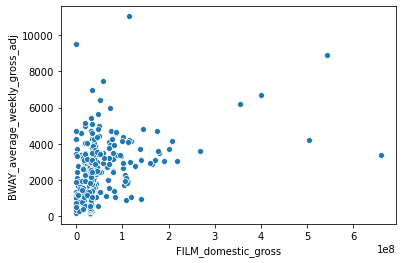

In [6]:
# Check against amount adjusted for 

sns.scatterplot(data=df, x='FILM_domestic_gross', y='BWAY_average_weekly_gross_adj')

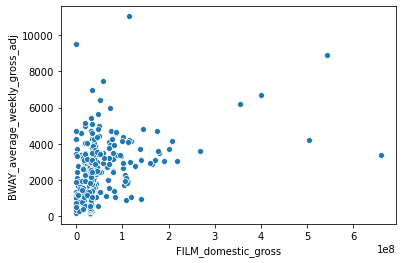

In [7]:
# Check against amount adjusted for 

sns.scatterplot(data=df, x='FILM_domestic_gross', y='BWAY_average_weekly_gross_adj')

<h3> Worldwide gross is similarly correlated:

<h4> Broadway Gross to Domestic (without adjustment)

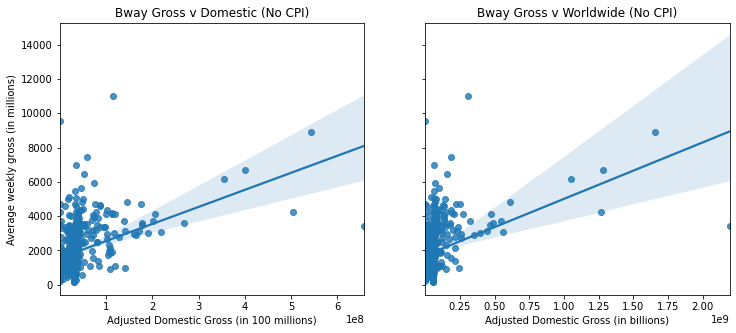

In [8]:
fig, (ax1, ax2) = plt.subplots(figsize=(12, 5), ncols=2, sharey=True)
ax1.set_title('Bway Gross v Domestic (No CPI)')
ax2.set_title('Bway Gross v Worldwide (No CPI)')

#ax1.set_axis_labels('Domestic Gross (in 100 mil)', 'Bway Total Gross (in bil)')
#ax2.set_axis_labels('Worldwide Gross (in 100 mil)', 'Bway Total Gross (in bil)')
sns.regplot(data = df, x='FILM_domestic_gross', y='BWAY_average_weekly_gross_adj', ax=ax1)
ax1.set(xlabel='Adjusted Domestic Gross (in 100 millions)', ylabel='Average weekly gross (in millions)')
sns.regplot(data = df, x='FILM_worldwide_gross', y='BWAY_average_weekly_gross_adj', ax=ax2);
ax2.set(xlabel='Adjusted Domestic Gross (in billions)', ylabel = '')
ax1.ticklabel_format(useOffset=False)
ax2.ticklabel_format(useOffset=False)

fig.savefig('test.jpg')

<h4> Broadway Gross to Domestic (with CPI adjustment)

<h3> The below shows that the relationship between film domestic gross and Broadway total gross is best applied to movies that are rated PG (graph 3).

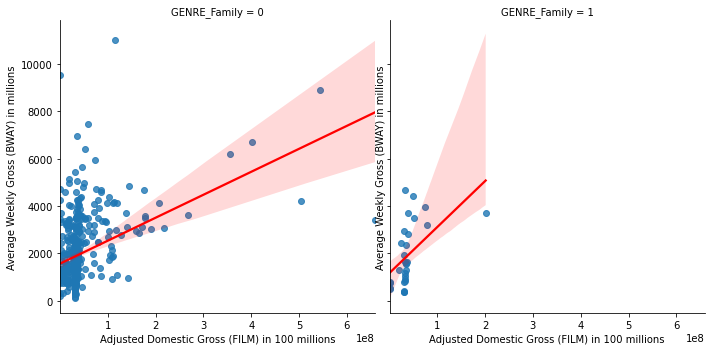

In [9]:
ax = sns.lmplot(x='FILM_domestic_gross', y='BWAY_average_weekly_gross_adj', col='GENRE_Family', data=df,
          line_kws={'color': 'red'});

ax.set(xlabel='Adjusted Domestic Gross (FILM) in 100 millions', ylabel='Average Weekly Gross (BWAY) in millions')

#fig.subplots_adjust(bottom=0.15, wspace=1)

ax.savefig('test3.jpg')

<br>

<h2>BROADWAY TO FILM - low R^2 scores and other poorly coorelated features led me to abandon this and only look at Film to Broadway examples (using Film as features, and Broadway gross as the target)

<h3> When using film success as a predictor for the stage version...

<h2>FILM TO BROADWAY

In [16]:
# Setting features from FILM data to target for BWAY data

X = df[['FILM_budget', 'FILM_oscars_won', 'FILM_domestic_gross', 'FILM_worldwide_gross',
          'FILM_mpaa_rating', 'FILM_runtime']]
y = df['BWAY_avg_weekly_gross']



In [23]:
# Create test_train_split set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)

lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.3051493704108764

In [24]:
# StatsModel investgation

model = sm.OLS(y, sm.add_constant(X)) 
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     BWAY_avg_weekly_gross   R-squared:                       0.210
Model:                               OLS   Adj. R-squared:                  0.200
Method:                    Least Squares   F-statistic:                     22.39
Date:                   Mon, 12 Oct 2020   Prob (F-statistic):           1.98e-23
Time:                           15:36:41   Log-Likelihood:                -7104.9
No. Observations:                    513   AIC:                         1.422e+04
Df Residuals:                        506   BIC:                         1.425e+04
Df Model:                              6                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  1.01e+05   4.83e+04      2.090      0.037    6042.549    1.96e+05
FILM_budget              0.0013      0.001      1.719      0.086      -0.000       0.003
FILM_oscars_won       6410.3627   1.12e+04      0.575      0.566   -1.55e+04    2.83e+04
FILM_domestic_gross      0.0025      0.001      3.509      0.000       0.001       0.004
FILM_worldwide_gross    -0.0004      0.000     -1.654      0.099      -0.001    7.98e-05
FILM_mpaa_rating      3.008e+04   8162.474      3.686      0.000     1.4e+04    4.61e+04
FILM_runtime          1159.4862    412.812      2.809      0.005     348.449    1970.524
==============================================================================
Omnibus:                      291.239   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3758.922
Skew:                           2.201   Prob(JB):                         0.00
Kurtosis:                      15.509   Cond. No.                     8.52e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.52e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
# Reset model to linear regression 
model = lr

In [26]:
res = model.predict(X_test) - y_test
res.sort_values().head(10)

263   -730665.823672
65    -609103.851716
509   -545617.728985
34    -525456.633720
67    -380238.201024
4     -317273.894965
194   -300477.810886
293   -290804.086475
481   -275408.114944
227   -268125.989272
Name: BWAY_avg_weekly_gross, dtype: float64

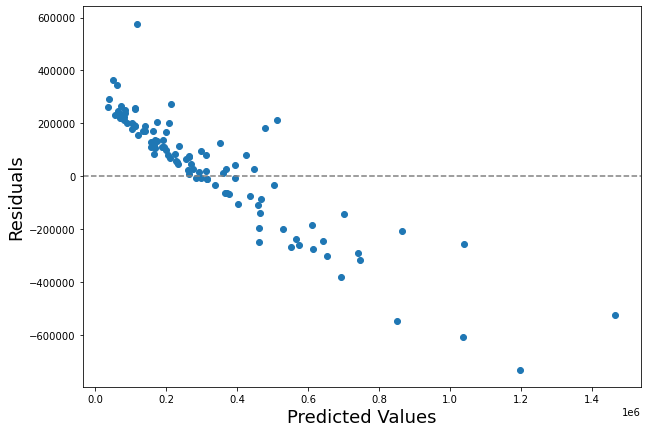

In [27]:
plt.figure(figsize=(10, 7))
plt.scatter(y_test, res)

plt.axhline(0, linestyle='--', color='gray')
plt.xlabel('Predicted Values', fontsize=18)
plt.ylabel('Residuals', fontsize=18);

<h4> The r^2 score is slightly higher, but the residuals are lumped into one area. This seems to imply interaction between the variables, or or the need for polynomial regression.


<h3>Polynomial Regression


    
<h4>Polynomial regression produced a similar R^2 - .339

In [30]:
from sklearn.preprocessing import PolynomialFeatures

p = PolynomialFeatures()
X_poly = p.fit_transform(X)

lr = LinearRegression()
lr.fit(X_poly, y)
lr.score(X_poly, y)

0.3398169266290655

<h4>But polynomial regression with the test set performed very poorly, with R^2 = -1.89

In [31]:
p = PolynomialFeatures()
X_train_poly = p.fit_transform(X_train)

lr = LinearRegression()

s = StandardScaler(with_mean=False)

X_train_poly_scaled = s.fit_transform(X_train_poly)
lr.fit(X_train_poly, y_train)
lr.score(X_train_poly_scaled,y_train)

-0.8900759716889626

<h3>LassoCV

<h4>Test of model with LassoCV (scroll down) - R^2 = .608

In [32]:
from sklearn.linear_model import LassoCV

m = LassoCV()
p = PolynomialFeatures(degree=2)

X_train_poly = p.fit_transform(X_train)

s = StandardScaler(with_mean=False)

X_train_poly_scaled = s.fit_transform(X_train_poly)
m.fit(X_train_poly_scaled,y_train)
m.score(X_train_poly_scaled,y_train)

/Users/nick/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3769569314.53125, tolerance: 2898310020.5240645
  model = cd_fast.enet_coordinate_descent_gram(
/Users/nick/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4413132635.316406, tolerance: 2898310020.5240645
  model = cd_fast.enet_coordinate_descent_gram(
/Users/nick/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5459302137.53125, tolerance: 2898310020.5240645
  model = cd_fast.enet_coordinate_descent_gram(
/Users/nick/opt/anaconda3/lib/python3.8/site-packages/sklear

/Users/nick/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1111592821948.7754, tolerance: 2720500415.4510417
  model = cd_fast.enet_coordinate_descent_gram(
/Users/nick/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1270174404373.043, tolerance: 2720500415.4510417
  model = cd_fast.enet_coordinate_descent_gram(
/Users/nick/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1432893649435.7344, tolerance: 2720500415.4510417
  model = cd_fast.enet_coordinate_descent_gram(
/Users/nick/opt/anaconda3/lib/python3.8/site-packages/sk

/Users/nick/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3473968662.7695312, tolerance: 2888174067.873294
  model = cd_fast.enet_coordinate_descent_gram(
/Users/nick/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5133353671.203125, tolerance: 2888174067.873294
  model = cd_fast.enet_coordinate_descent_gram(
/Users/nick/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13638098718.25, tolerance: 2888174067.873294
  model = cd_fast.enet_coordinate_descent_gram(
/Users/nick/opt/anaconda3/lib/python3.8/site-packages/sklearn/l

0.1939178413106898

<h4> Test of Test set with LassoCV (scroll down) - R^2 = 0.271

In [33]:
m = LassoCV()
p = PolynomialFeatures(degree=2)

X_test_poly = p.fit_transform(X_test)

s = StandardScaler(with_mean=False)

X_test_poly_scaled = s.fit_transform(X_test_poly)
model = m.fit(X_train_poly_scaled,y_train)
model.score(X_test_poly_scaled,y_test)

/Users/nick/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3769569314.53125, tolerance: 2898310020.5240645
  model = cd_fast.enet_coordinate_descent_gram(
/Users/nick/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4413132635.316406, tolerance: 2898310020.5240645
  model = cd_fast.enet_coordinate_descent_gram(
/Users/nick/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5459302137.53125, tolerance: 2898310020.5240645
  model = cd_fast.enet_coordinate_descent_gram(
/Users/nick/opt/anaconda3/lib/python3.8/site-packages/sklear

/Users/nick/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1023971086600.25, tolerance: 2720500415.4510417
  model = cd_fast.enet_coordinate_descent_gram(
/Users/nick/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1111592821948.7754, tolerance: 2720500415.4510417
  model = cd_fast.enet_coordinate_descent_gram(
/Users/nick/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1270174404373.043, tolerance: 2720500415.4510417
  model = cd_fast.enet_coordinate_descent_gram(
/Users/nick/opt/anaconda3/lib/python3.8/site-packages/skle

/Users/nick/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37110738293.50781, tolerance: 2888174067.873294
  model = cd_fast.enet_coordinate_descent_gram(
/Users/nick/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39207270496.234375, tolerance: 2888174067.873294
  model = cd_fast.enet_coordinate_descent_gram(
/Users/nick/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39135639872.55859, tolerance: 2888174067.873294
  model = cd_fast.enet_coordinate_descent_gram(
/Users/nick/opt/anaconda3/lib/python3.8/site-packages/sklear

0.2650130567369223

<h3>Ridge CV

<h4>Test of Model w RidgeCV - R^2 = .901

In [34]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

m = RidgeCV()
p = PolynomialFeatures(degree=2)

#X_train_poly = p.fit_transform(X_train)

s = StandardScaler(with_mean=False)

X_train_scaled = s.fit_transform(X_train)
m.fit(X_train_scaled,y_train)
m.score(X_train_scaled,y_train)

0.18261729173266672

<h4>Test of test data w RidgeCV - R^2 = -.286

In [35]:
m = RidgeCV()
p = PolynomialFeatures(degree=2)

X_test_poly = p.fit_transform(X_test)

s = StandardScaler(with_mean=False)

X_train_scaled = s.fit_transform(X_train)
X_test_scaled = s.fit_transform(X_test)
m.fit(X_train_scaled,y_train)
m.score(X_test_scaled,y_test)

0.29469660767832173

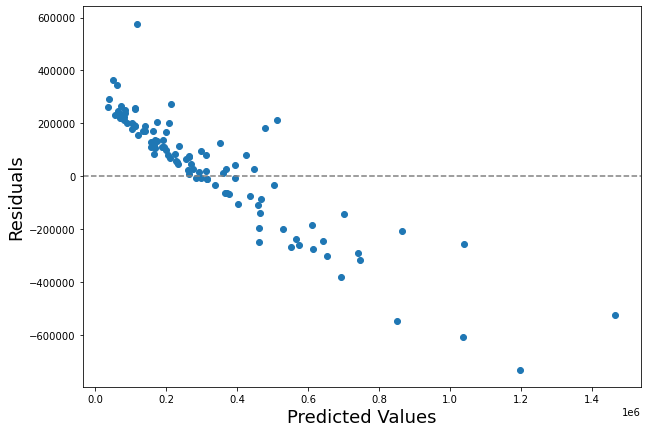

In [36]:
plt.figure(figsize=(10, 7))
plt.scatter(y_test, res)

plt.axhline(0, linestyle='--', color='gray')
plt.xlabel('Predicted Values', fontsize=18)
plt.ylabel('Residuals', fontsize=18);

In [40]:
X_train_poly.shape

(410, 28)

<h3> To achieve more scaled variables, I fit a StandardScaler to the model, and applied a new LASSO regression

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(X_train.values)

StandardScaler()

In [39]:
# Applied scaler to train and test set
X_tr = std.transform(X_train.values)
X_te = std.transform(X_test.values)

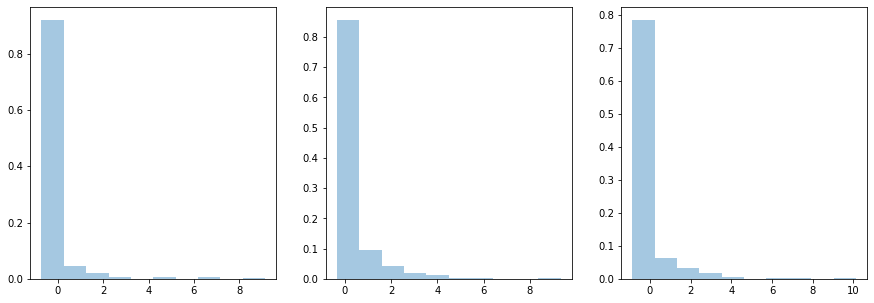

In [40]:
# Use visualization to view transformed variables - large left skew towards zero on all accounts
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.distplot(X_tr[:, 0], label='feature 1', ax=axes[0], kde=False, bins=10, norm_hist=True)
sns.distplot(X_tr[:, 1], label='feature 2', ax=axes[1], kde=False, bins=10, norm_hist=True)
sns.distplot(X_tr[:, 2], label='feature 3', ax=axes[2], kde=False, bins=10, norm_hist=True)

In [41]:
lasso_model = Lasso(alpha = 100)
lasso_model.fit(X_tr,y_train)

Lasso(alpha=100)

In [213]:
list(zip(X_train.columns, lasso_model.coef_))

[('FILM_budget', -8955727.4806042),
 ('FILM_oscars_won', 11023480.888531774),
 ('FILM_domestic_gross', -31682956.64248365),
 ('FILM_worldwide_gross', 112323397.4202749),
 ('FILM_mpaa_rating_number', 5419342.572314452),
 ('FILM_runtime', 3296342.868624636)]

In [42]:
test_set_pred = lasso_model.predict(X_test)

In [43]:
r2_score(y_test, test_set_pred)

-1.4973028229047228e+16

<h3> Even with the standardized coeffecients, the r^2 score with LASSO is not good.

<h2>Appendix-ish

In [235]:
#set up the 3 models we're choosing from:

lr = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lr_reg = Ridge(alpha=1)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lr_poly = LinearRegression()

In [239]:
lr.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lr.score(X_val, y_val):.3f}')

lr_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lr_reg.score(X_val_scaled, y_val):.3f}')

lr_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lr_poly.score(X_val_poly, y_val):.3f}')

Linear Regression val R^2: -0.805
Ridge Regression val R^2: -0.768
Degree 2 polynomial regression val R^2: -5.146


In [220]:
# Set up plot for how errors changes as alpha changes 

def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

alphalist = 10**(np.linspace(-2,2,200))
err_vec_val = np.zeros(len(alphalist))
err_vec_train = np.zeros(len(alphalist))

for i,curr_alpha in enumerate(alphalist):

    # note the use of a new sklearn utility: Pipeline to pack
    # multiple modeling steps into one fitting process 
    steps = [('standardize', StandardScaler()), 
             ('lasso', Lasso(alpha = curr_alpha))]

    pipe = Pipeline(steps)
    pipe.fit(X_train.loc[:,columns_list].values, y_train)
    
    val_set_pred = pipe.predict(X_val.loc[:,columns_list].values)
    err_vec_val[i] = mae(y_val, val_set_pred)

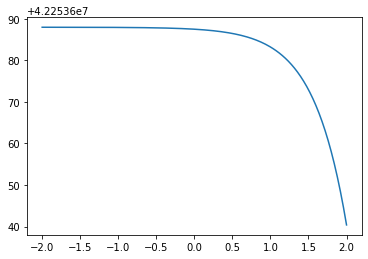

In [221]:
# Curve of validation error as alpha changes

plt.plot(np.log10(alphalist), err_vec_val)

<h4> Note: I did try feature transformation and created a value "BWAY_relative_gross", which was essentially actual gross / divided by potential gross
    

In [77]:
# Sets all infinity values to the mean of the non-infinity values for BWAY_relative_gross

non_infinity_mean = df[df['BWAY_relative_gross'] != np.inf]['BWAY_relative_gross'].mean()

df.loc[df.BWAY_relative_gross == np.inf, 'BWAY_relative_gross'] = non_infinity_mean

In [95]:
newX = df[['FILM_budget', 'FILM_oscars_won', 'FILM_domestic_gross', 'FILM_worldwide_gross',
          'FILM_mpaa_rating_number', 'FILM_runtime']]
newy = df['BWAY_relative_gross']

In [96]:
lr.fit(newX, newy)
lr.score(newX, newy)

0.02003801090133772

In [97]:
from sklearn.preprocessing import PolynomialFeatures

p = PolynomialFeatures()
X_poly = p.fit_transform(newX)

lr_full = LinearRegression()
lr_full.fit(X_poly, newy)
lr_full.score(X_poly, newy)

0.029795610152947405

<h4> This did not work so well, so I stuck with actual gross of each stage production.

In [243]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 1/3)

In [244]:
lr.fit(x_train, y_train)

LinearRegression()

In [245]:
lr.score(x_train, y_train)

0.11533351656294266

<h2>Ultimately, the results were inconclusive, mostly due to a lack of non-corrupt data. However:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

%matplotlib inline


# CREATE BITS COMPARING THE MOVIES FIRST MUSICALS FIRST, ETC. 

new_df = pd.read_csv('data/curiousity_dataset_101020.csv')

In [2]:
new_df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,title,FILM_runtime,FILM_stars,FILM_directors,FILM_filming_locations,FILM_aka,FILM_oscars_won,...,GENRE_Fantasy,GENRE_Horror,GENRE_Music,GENRE_Musical,GENRE_Mystery,GENRE_Romance,GENRE_Sport,GENRE_Thriller,GENRE_War,GENRE_Western
0,0,24792,24792,"'night, Mother",96.0,"['Sissy Spacek', 'Anne Bancroft', 'Ed Berke']",['Tom Moore'],"Universal Studios - 100 Universal City Plaza, ...","'night, Mother",1.0,...,0,0,0,0,0,0,0,0,0,0
1,1,25469,25469,A Bronx Tale,121.0,"['Robert De Niro', 'Chazz Palminteri', 'Lillo ...",['Robert De Niro'],"4408 30th Avenue, Astoria, Queens, New York Ci...",A Bronx Tale,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2,5161,5161,A Chorus Line,113.0,"['Michael Douglas', 'Terrence Mann', 'Michael ...",['Richard Attenborough'],"Helen Hayes Theater - 240 West 44th Street, Ma...",A Chorus Line,3.0,...,0,0,0,0,0,1,0,0,0,0
3,3,6804,6804,A Christmas Carol,96.0,"['Jim Carrey', 'Gary Oldman', 'Colin Firth']",['Robert Zemeckis'],Not found,A Christmas Carol: An IMAX 3D Experience,0.0,...,0,0,1,1,0,0,0,0,0,0
4,4,24643,24643,A Christmas Story,94.0,"['Peter Billingsley', 'Melinda Dillon', 'Darre...",['Bob Clark'],"232 Queen St W, Toronto, Ontario, Canada",A Christmas Story,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,221,22530,22530,Who's Afraid of Virginia Woolf?,131.0,"['Elizabeth Taylor', 'Richard Burton', 'George...",['Mike Nichols'],"Cambridge, Massachusetts, USA",Edward Albee's Who's Afraid of Virginia Woolf?,0.0,...,0,0,0,1,0,1,0,0,0,0
222,222,26558,26558,Wonderful Town,92.0,"['Anchalee Saisoontorn', 'Supphasit Kansen', '...",['Aditya Assarat'],"Pakua Pak, Thailand",Cudowne miasto,0.0,...,0,0,0,0,0,0,0,0,0,0
223,223,25900,25900,Wonderland,104.0,"['Val Kilmer', 'Lisa Kudrow', 'Kate Bosworth']",['James Cox'],"California, USA",The Wonderland Murders,0.0,...,0,0,0,0,0,1,0,0,0,0
224,224,5143,5143,Xanadu,96.0,"['Olivia Newton-John', 'Gene Kelly', 'Michael ...",['Robert Greenwald'],Pan-Pacific Auditorium - 7600 W. Beverly Boule...,Xanadu,0.0,...,0,0,0,0,1,0,0,1,0,0


In [3]:
new_df.corr()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,FILM_runtime,FILM_oscars_won,FILM_budget,FILM_domestic_gross,FILM_worldwide_gross,FILM_mpaa_rating,BWAY_total_weekly_gross,...,GENRE_Fantasy,GENRE_Horror,GENRE_Music,GENRE_Musical,GENRE_Mystery,GENRE_Romance,GENRE_Sport,GENRE_Thriller,GENRE_War,GENRE_Western
Unnamed: 0,1.000000,0.045721,0.045721,0.034655,0.040985,-0.129365,-0.037681,-0.022731,-0.127344,0.035686,...,-0.040726,-0.013374,-0.024063,-0.016957,0.025058,0.089159,-0.021604,0.022310,0.043182,0.107179
Unnamed: 0.1,0.045721,1.000000,1.000000,-0.198597,-0.055363,-0.346464,-0.268791,-0.283539,0.252707,-0.386195,...,0.071615,0.067229,0.041544,-0.000808,-0.060751,0.126596,-0.071540,-0.103812,0.000826,0.071449
Unnamed: 0.1.1,0.045721,1.000000,1.000000,-0.198597,-0.055363,-0.346464,-0.268791,-0.283539,0.252707,-0.386195,...,0.071615,0.067229,0.041544,-0.000808,-0.060751,0.126596,-0.071540,-0.103812,0.000826,0.071449
FILM_runtime,0.034655,-0.198597,-0.198597,1.000000,0.213329,0.249552,0.293302,0.249041,0.010961,0.144062,...,-0.064509,0.006684,-0.044788,0.054389,-0.145714,-0.074717,0.066019,-0.000267,0.017440,-0.019001
FILM_oscars_won,0.040985,-0.055363,-0.055363,0.213329,1.000000,0.031649,0.040084,0.009335,0.040306,0.092982,...,-0.001117,-0.026899,-0.055313,-0.022995,-0.080075,0.066929,0.177250,0.054337,0.073905,0.013000
FILM_budget,-0.129365,-0.346464,-0.346464,0.249552,0.031649,1.000000,0.755327,0.789415,-0.091369,0.481769,...,0.049274,-0.014249,0.008599,0.086331,-0.094839,-0.140285,-0.048679,-0.100464,0.167715,-0.055143
FILM_domestic_gross,-0.037681,-0.268791,-0.268791,0.293302,0.040084,0.755327,1.000000,0.955744,-0.033254,0.427195,...,0.062562,0.060767,-0.046661,0.019716,-0.050457,-0.075829,-0.026032,-0.026187,0.022195,-0.040719
FILM_worldwide_gross,-0.022731,-0.283539,-0.283539,0.249041,0.009335,0.789415,0.955744,1.000000,-0.054908,0.472291,...,0.058707,0.037935,-0.061083,-0.005882,-0.054205,-0.102516,-0.036526,-0.062680,0.059958,-0.035330
FILM_mpaa_rating,-0.127344,0.252707,0.252707,0.010961,0.040306,-0.091369,-0.033254,-0.054908,1.000000,-0.057916,...,0.073574,-0.055500,-0.004836,-0.017464,0.069314,-0.085850,-0.002352,0.024566,0.059149,0.073172
BWAY_total_weekly_gross,0.035686,-0.386195,-0.386195,0.144062,0.092982,0.481769,0.427195,0.472291,-0.057916,1.000000,...,0.071085,-0.038837,-0.062218,0.075294,-0.056734,-0.066136,-0.022497,-0.013649,0.054544,0.014371


In [40]:
new_df['FILM_budget'] = new_df['FILM_budget'].fillna(new_df['FILM_budget'].mean())
new_df['FILM_oscars_won'] = new_df['FILM_oscars_won'].fillna(new_df['FILM_oscars_won'].mean())
new_df['FILM_domestic_gross'] = new_df['FILM_domestic_gross'].fillna(new_df['FILM_domestic_gross'].mean())
new_df['FILM_worldwide_gross'] = new_df['FILM_worldwide_gross'].fillna(new_df['FILM_worldwide_gross'].mean())
new_df['FILM_mpaa_rating'] = new_df['FILM_mpaa_rating'].fillna(new_df['FILM_mpaa_rating'].mean())
new_df['FILM_runtime'] = new_df['FILM_runtime'].fillna(new_df['FILM_runtime'].mean())

In [54]:
# Setting features from FILM data to target for BWAY data

X = new_df[['FILM_budget', 'FILM_oscars_won', 'FILM_domestic_gross', 'FILM_worldwide_gross',
          'FILM_mpaa_rating', 'FILM_runtime']]
y = new_df['BWAY_total_weekly_gross']


In [74]:
# Create test_train_split set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=12)

lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.5705179168829275

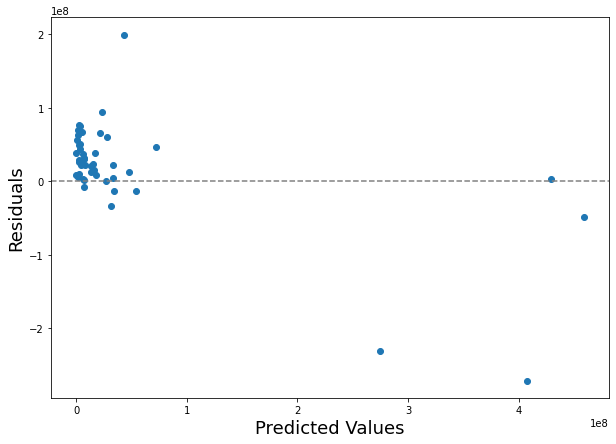

In [75]:
# Reset model to linear regression 
model = lr

res = model.predict(X_test) - y_test
res.sort_values().head(10)

plt.figure(figsize=(10, 7))
plt.scatter(y_test, res)

plt.axhline(0, linestyle='--', color='gray')
plt.xlabel('Predicted Values', fontsize=18)
plt.ylabel('Residuals', fontsize=18);

In [77]:
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LassoCV

m = LassoCV()
p = PolynomialFeatures(degree=2)

X_train_poly = p.fit_transform(X_train)

s = StandardScaler(with_mean=False)

X_train_poly_scaled = s.fit_transform(X_train_poly)
m.fit(X_train_poly_scaled,y_train)
m.score(X_train_poly_scaled,y_train)

/Users/nick/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1939943359123968e+16, tolerance: 574732940813299.9
  model = cd_fast.enet_coordinate_descent_gram(
/Users/nick/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.419761296431155e+16, tolerance: 574732940813299.9
  model = cd_fast.enet_coordinate_descent_gram(
/Users/nick/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.440592958109363e+16, tolerance: 574732940813299.9
  model = cd_fast.enet_coordinate_descent_gram(
/Users/nick/opt/anaconda3/lib/python3.8/site-pac

/Users/nick/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 409789607764736.0, tolerance: 284625621254411.25
  model = cd_fast.enet_coordinate_descent_gram(
/Users/nick/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 451258846244352.0, tolerance: 284625621254411.25
  model = cd_fast.enet_coordinate_descent_gram(
/Users/nick/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 980405130914816.0, tolerance: 284625621254411.25
  model = cd_fast.enet_coordinate_descent_gram(
/Users/nick/opt/anaconda3/lib/python3.8/site-packages/skle

0.47631324293576915

In [79]:
m = LassoCV()
p = PolynomialFeatures(degree=2)

X_test_poly = p.fit_transform(X_test)

s = StandardScaler(with_mean=False)

X_test_poly_scaled = s.fit_transform(X_test_poly)
model = m.fit(X_train_poly_scaled,y_train)
model.score(X_test_poly_scaled,y_test)

/Users/nick/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1939943359123968e+16, tolerance: 574732940813299.9
  model = cd_fast.enet_coordinate_descent_gram(
/Users/nick/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.419761296431155e+16, tolerance: 574732940813299.9
  model = cd_fast.enet_coordinate_descent_gram(
/Users/nick/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.440592958109363e+16, tolerance: 574732940813299.9
  model = cd_fast.enet_coordinate_descent_gram(
/Users/nick/opt/anaconda3/lib/python3.8/site-pac

/Users/nick/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 409789607764736.0, tolerance: 284625621254411.25
  model = cd_fast.enet_coordinate_descent_gram(
/Users/nick/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 451258846244352.0, tolerance: 284625621254411.25
  model = cd_fast.enet_coordinate_descent_gram(
/Users/nick/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 980405130914816.0, tolerance: 284625621254411.25
  model = cd_fast.enet_coordinate_descent_gram(
/Users/nick/opt/anaconda3/lib/python3.8/site-packages/skle

0.3943166784020484

In [80]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

m = RidgeCV()
p = PolynomialFeatures(degree=2)

#X_train_poly = p.fit_transform(X_train)

s = StandardScaler(with_mean=False)

X_train_scaled = s.fit_transform(X_train)
m.fit(X_train_scaled,y_train)
m.score(X_train_scaled,y_train)

0.21500497012160646

In [81]:
m = RidgeCV()
p = PolynomialFeatures(degree=2)

X_test_poly = p.fit_transform(X_test)

s = StandardScaler(with_mean=False)

X_train_scaled = s.fit_transform(X_train)
X_test_scaled = s.fit_transform(X_test)
m.fit(X_train_scaled,y_train)
m.score(X_test_scaled,y_test)

0.5674361807298384

In [94]:
m.predict(X_test_scaled)

array([ 5.74010161e+07,  1.01338898e+08,  4.50156373e+07,  3.64460482e+07,
        2.46167171e+07,  3.59732980e+07,  5.21148258e+07,  2.55626830e+07,
        3.13421063e+07,  3.48850905e+06,  2.29182873e+07,  2.97147221e+07,
        7.39576547e+07,  5.68834359e+07,  3.03313664e+07,  2.65182831e+07,
        1.13289314e+08,  4.37677057e+07,  1.00447605e+07,  4.11748563e+07,
        3.93862606e+08,  5.32859625e+07,  2.75836939e+07,  1.26614471e+08,
        5.78625202e+07,  4.10534751e+07,  6.98619486e+07,  5.88228233e+07,
        2.32073179e+07,  4.41232286e+08,  3.45608733e+07,  2.56739459e+07,
       -5.56839658e+06,  2.36026023e+08,  7.16202504e+07,  6.22727036e+06,
       -3.36717997e+06,  6.08170783e+07,  3.67856021e+06,  4.64118838e+06,
        4.19580979e+07,  3.49657200e+07,  8.46410584e+07,  6.57306671e+07,
        1.31973458e+08,  5.44658906e+07])

In [98]:
res.sort_values().head(10)

41    -2.758585e+08
148   -2.330733e+08
12    -6.495226e+07
124   -3.473802e+07
147   -1.240409e+07
77    -9.008984e+06
183   -4.094315e+06
52    -3.553833e+06
16    -9.862905e+05
143    3.076304e+06
Name: BWAY_total_weekly_gross, dtype: float64

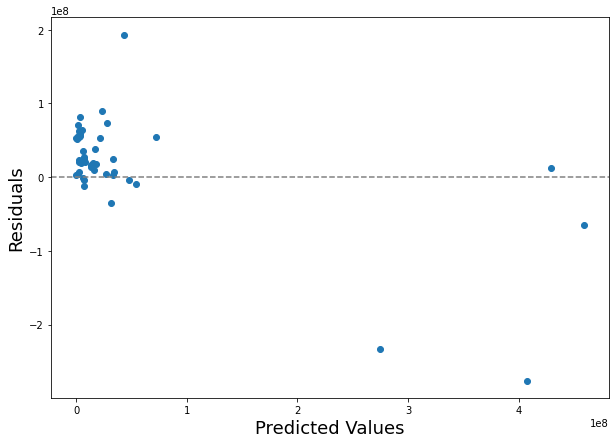

In [95]:
model = lr

res = m.predict(X_test_scaled) - y_test

plt.figure(figsize=(10, 7))
plt.scatter(y_test, res)

plt.axhline(0, linestyle='--', color='gray')
plt.xlabel('Predicted Values', fontsize=18)
plt.ylabel('Residuals', fontsize=18);